In [63]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [143]:
#Importando datasets
#fonte: https://www.kaggle.com/c/titanic/data
df_train = pd.read_csv("titanic/train.csv")
df_test = pd.read_csv("titanic/test.csv")

In [147]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Embarked,binned
0,1,0,3,male,22,S,"(10, 25]"
1,2,1,1,female,38,C,"(25, 40]"
2,3,1,3,female,26,S,"(25, 40]"
3,4,1,1,female,35,S,"(25, 40]"
4,5,0,3,male,35,S,"(25, 40]"


In [148]:
df_test.head()

,PassengerId,Pclass,Sex,Age,Embarked,binned
0,892,3,male,35,Q,"(25, 40]"
1,893,3,female,47,S,"(40, 50]"
2,894,2,male,62,Q,"(50, 70]"
3,895,3,male,27,S,"(25, 40]"
4,896,3,female,22,S,"(10, 25]"


In [146]:
#Selecionando features
features = ['PassengerId','Survived', 'Pclass','Sex','Age', 'Embarked']


df_train = df_train[features]

df_test = df_test[[k for k in features if k !='Survived']]

#Deletando valores missing
df_train.dropna(subset=['Age', 'Embarked'],inplace=True)

df_test.dropna(subset=['Age','Embarked'],inplace=True)

#math.ceil() para eliminar valores decimais e tornar o número inteiro coluna 'Age'
df_train['Age'] = df_train.Age.apply(math.ceil).astype('int')
df_test['Age'] = df_test.Age.apply(math.ceil).astype('int')

#Categorizar as idades
bins = [0,1,3, 5, 10, 25,40, 50,70,100]
df_train['binned'] = pd.cut(df_train['Age'], bins)
df_test['binned'] = pd.cut(df_test['Age'], bins)

#Alterando o tipo das variáveis
df_train['Survived'] = df_train.Survived.astype('int')
df_train['Pclass'] = df_train.Pclass.astype('object')
df_test['Pclass'] = df_test.Pclass.astype('object')

In [149]:
#Visualizando os dados do menor para o maior a partir da coluna 'Age'
df_train.sort_values(by = 'Age', ascending=True)

,PassengerId,Survived,Pclass,Sex,Age,Embarked,binned
305,306,1,1,male,1,S,"(0, 1]"
755,756,1,2,male,1,S,"(0, 1]"
644,645,1,3,female,1,C,"(0, 1]"
164,165,0,3,male,1,S,"(0, 1]"
183,184,1,2,male,1,S,"(0, 1]"
831,832,1,2,male,1,S,"(0, 1]"
381,382,1,3,female,1,C,"(0, 1]"
172,173,1,3,female,1,S,"(0, 1]"
386,387,0,3,male,1,S,"(0, 1]"
788,789,1,3,male,1,S,"(0, 1]"


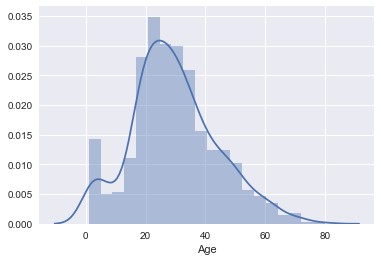

In [150]:
#Visualizando a distribuição das idades
sns.distplot(a = df_train.Age,kde=True)

In [151]:
#Separando uma lista das colunas de categorias determidadas
category_features = df_train.select_dtypes(['object','category']).columns.tolist()
category_features


['Pclass', 'Sex', 'Embarked', 'binned']

In [205]:
#Visualizando um dataset binário das colunas com variáveis classificadoras
#Método get_dummies do pandas
pd.get_dummies(df_train[category_features])

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,"binned_(0, 1]","binned_(1, 3]","binned_(3, 5]","binned_(5, 10]","binned_(10, 25]","binned_(25, 40]","binned_(40, 50]","binned_(50, 70]","binned_(70, 100]"
0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0
1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0
3,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0
6,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
7,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0
8,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0
9,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
10,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0


In [94]:
#Importando algoritimos de predição
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix

In [154]:
#Definindo as variáveis de treino
x = pd.get_dummies(df_train[category_features]).values
y = df_train.Survived.values


In [198]:
#Treinando o modelo

#ExtraTreesClassifier()
estimator = ExtraTreesClassifier(n_estimators=100,bootstrap=True)
estimator.fit(x,y)

#KNeighborsClassifier()
estimator2 = KNeighborsClassifier()
estimator2.fit(x,y)

#GaussianNB()
estimator3 = GaussianNB()
estimator3.fit(x,y)



GaussianNB(priors=None)

In [199]:
#Testando o modelo
pred = estimator.predict(pd.get_dummies(df_test[category_features]).values)
pred2 = estimator2.predict(pd.get_dummies(df_test[category_features]).values)
pred3 = estimator3.predict(pd.get_dummies(df_test[category_features]).values)

In [192]:
#Importanto o dataset com os valores reais
#fonte: https://www.kaggle.com/c/titanic/data
df_re = pd.read_csv('titanic/gender_submission.csv')
df_re

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [193]:
#Adionando os valores reais de sobreviventes ao dataset de teste, junto com os valores previstos pelo modelo
#Método Merge do pandas
fram = df_test.merge(df_re[['PassengerId', 'Survived']], how = 'left')

In [195]:
fram['pred'] = pred

In [196]:
fram

,PassengerId,Pclass,Sex,Age,Embarked,binned,Survived,pred
0,892,3,male,35,Q,"(25, 40]",0,0
1,893,3,female,47,S,"(40, 50]",1,0
2,894,2,male,62,Q,"(50, 70]",0,0
3,895,3,male,27,S,"(25, 40]",0,0
4,896,3,female,22,S,"(10, 25]",1,0
5,897,3,male,14,S,"(10, 25]",0,0
6,898,3,female,30,Q,"(25, 40]",1,0
7,899,2,male,26,S,"(25, 40]",0,0
8,900,3,female,18,C,"(10, 25]",1,1
9,901,3,male,21,S,"(10, 25]",0,0


ExtraTreesClassifier
accuracy_score: 0.864457831325


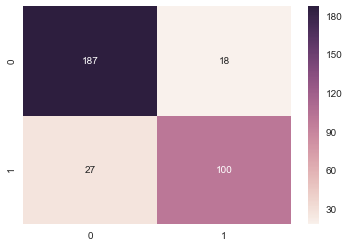

In [187]:
#Visualizando a confusion matrix (valores reaisXvalores previstos)
#accuracy_score

#ExtraTreesClassifier
print('ExtraTreesClassifier')
sns.heatmap(confusion_matrix(y_true = fram['Survived'].values , y_pred= pred),annot=True,fmt='d')

print('accuracy_score:',accuracy_score(y_true = fram['Survived'].values, y_pred=pred))



KNeighborsClassifier
accuracy_score: 0.876506024096


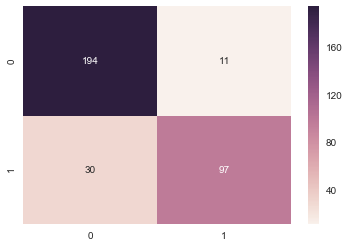

In [201]:
#KNeighborsClassifier
print('KNeighborsClassifier')
sns.heatmap(confusion_matrix(y_true = fram['Survived'].values , y_pred= pred2),annot=True,fmt='d')

print('accuracy_score:',accuracy_score(y_true = fram['Survived'].values, y_pred=pred2))

GaussianNB
accuracy_score: 0.852409638554


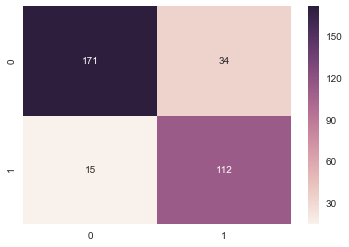

In [207]:
#GaussianNB
print('GaussianNB')
sns.heatmap(confusion_matrix(y_true = fram['Survived'].values , y_pred= pred3),annot=True,fmt='d')

print('accuracy_score:',accuracy_score(y_true = fram['Survived'].values, y_pred=pred3))